In [54]:
import pandas as pd
import numpy as np
import random
import re
from mpl_toolkits.mplot3d import Axes3D
file_path = 'C:/Users/poung/OneDrive/바탕 화면/Heanth-kit/Health-Kit/food_data.csv'
df = pd.read_csv(file_path)
df.fillna(0, inplace=True)
file_path2 = 'C:/Users/poung/OneDrive/바탕 화면/capstone/질병.csv'
dis = pd.read_csv(file_path2)
file_path3 = 'C:/Users/poung/OneDrive/바탕 화면/capstone/modified_merged_dat.csv'
med = pd.read_csv(file_path3)

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## 대표적인 변경사항
 person객체에 먹은 음식들 영양정보를 저장하는 리스트가 생김
 약품 함수들 대거 추가
 영양 성분이 초과해도 그냥 영양분을 추

In [81]:
class Person:
    c = 324
    s = 100
    f = 54
    t= 100
    sa = 14
    ch= 300
    p= 55
    ca= 700
    so = 2000
    disease = []
    today_kcal = []
    today_pro = []
    today_car = []
    today_fat = []
    def cal_nut(self):
        if self.age <= 18:
            self.Kcal = 2700
        elif self.age <= 29:
            self.Kcal = 2600
        elif self.age <= 49:
            self.Kcal = 2400
        elif self.age <= 64:
            self.Kcal = 2200
        elif self.age <= 74:
            self.Kcal = 2300
        else:
            self.Kcal = 2000

        if self.gender == 'female':
            self.Kcal -= 400
            
    def __init__(self, age, gender,disease=None):
        self.age = age
        self.gender = gender
        self.Kcal = 0
        self.carbo = self.c
        self.sugars = self.s
        self.fats = self.f
        self.trans_fats = self.t
        self.saturated_fats = self.sa
        self.cholesterol = self.ch
        self.protein = self.p
        self.calcium = self.ca
        self.sodium = self.so
        self.disease = disease
        self.cal_nut()
        self.today_kcal = []
        self.today_pro = []
        self.today_car = []
        self.today_fat = []

    def daily_reset(self):
        self.cal_nut()
        self.carbo = self.c
        self.sugars = self.s
        self.fats = self.f
        self.trans_fats = self.t
        self.saturated_fats = self.sa
        self.cholesterol = self.ch
        self.protein = self.p
        self.calcium = self.ca
        self.sodium = self.so
        self.today_pro = []
        self.today_car = []
        self.today_fat = []
        
    def extra_nut(self):
        return (self.Kcal, self.carbo, self.sugars, self.fats, 
                self.trans_fats, self.saturated_fats, self.cholesterol, 
                self.protein, self.calcium, self.sodium)
    
    def eat(self, kal=0, car=0, sug=0, fat=0, trans=0, sat=0, chol=0, pro=0, cal=0, sod=0):
        self.Kcal -= kal
        self.carbo -= car
        self.sugars -= sug
        self.fats -= fat
        self.trans_fats -= trans
        self.saturated_fats -= sat
        self.cholesterol -= chol
        self.protein -= pro
        self.calcium -= cal
        self.sodium -= sod
        self.append_eat(kal,pro,car,fat) #음식 섭취시에 자동으로 추가
        
    def custom(self, **key):
        for nut, val in key.items():
            if hasattr(self, nut):
                setattr(self, nut, val)
                
    def disease_return(self):
        return self.disease
    
    def append_disease(self,disease):
        self.disease.append(disease)
        
    def append_eat(self, kcal, pro, car, fat): #오늘 섭취한 음식 추가
        if len(self.today_kcal) > 0:
            kcal += self.today_kcal[-1] 
        self.today_kcal.append(kcal)
        self.today_pro.append(pro)
        self.today_car.append(car)
        self.today_fat.append(fat)

    def return_eat(self):
        return self.today_kcal, self.today_pro, self.today_car, self.today_fat

def find_food(food_name, df):
    food_list = df[df['식품명'].str.contains(food_name, case=False)]
    
    if food_list.empty:
        print("해당하는 음식이 없습니다.")
    else:
        print("해당하는 음식 리스트:")
        for index, row in food_list.iterrows():
            print(row['식품명'])
        return food_list.index.tolist()

def select_food(food_name, df):
    food_info = df[df['식품명'].str.contains(food_name, case=False)]
    
    if food_info.empty:
        print("해당하는 음식이 없습니다.")
    else:
        print("해당하는 음식 정보1:")
        return(food_info.iloc[:, 1:])
    
def select_food_category(category, df):
    food_info = df[df['분류'].str.contains(category, case=False)]
    
    if food_info.empty:
        print("해당하는 음식이 없습니다.")
    else:
        print("해당하는 음식 정보:")
        return food_info.iloc[:, 1:]

def deny_food(food_num, df):
    recommend = recommend_food(food_num, df)
    print(recommend)
    
def confirm_food(food_num, df, person):
    food_info = df.iloc[food_num, 2:12]
    person_nutrients = person.extra_nut()
    if any(person_nutrients[i] <= food_info.iloc[i] for i in range(len(person_nutrients))):
         print("일일 영양섭취 초과입니다")
         deny_food(food_num, df)
    else:
         person.eat(*food_info)


                       
def recommend_food(food_num, df):
    selected_food = df.iloc[food_num]
    category_name = selected_food['분류']
    kcal, carbo, sugar, fats, trans_fats, sat_fats, cholesterol, protein, calcium, sodium = person.extra_nut()
    
    sim_foods = df[(df['분류'] == category_name) &
                   (df['에너지(kcal)'] <= kcal) &
                   (df['탄수화물(g)'] <= carbo) &
                   (df['지방(g)'] <= fats) &
                   (df['당류(g)'] <= sugar) &
                   (df['트랜스지방산(g)'] <= trans_fats) &
                   (df['포화지방산(g)'] <= sat_fats) &
                   (df['콜레스테롤(mg)'] <= cholesterol) &
                   (df['단백질(g)'] <= protein) &
                   (df['칼슘(mg)'] <= calcium) &
                   (df['나트륨(mg)'] <= sodium)].copy()

    sim_foods['similarity'] = sim_foods['식품명'].apply(lambda x: similar(x, selected_food['식품명']))
    sim_foods = sim_foods.sort_values(by='similarity', ascending=False)

    return sim_foods.iloc[0:10, 1:]

def similar(a, b):
    if a == b:
        return 1.0
    else:
        n, m = len(a), len(b)
        if n > m:
            a, b = b, a
            n, m = m, n

        current_row = range(n+1)
        for i in range(1, m+1):
            previous_row, current_row = current_row, [i] + [0] * n
            for j in range(1, n+1):
                add, delete, change = previous_row[j]+1, current_row[j-1]+1, previous_row[j-1]
                if a[j-1] != b[i-1]:
                    change += 1
                current_row[j] = min(add, delete, change)

        return 1 - (current_row[n] / max(m, n))
    
def ran_food_recom(df):
    ind = random.sample(range(len(df)), 10)
    sel = df.iloc[ind, 1:]
    return sel

def consume_food(per, kal=0, car=0, sug=0, fat=0, trans=0, sat=0, chol=0, pro=0, cal=0, sod=0):
    # 오늘의 여유분 계산
    kcal, carbo, sugars, fats, trans_fats,sat_fats, cholesterol, protein, calcium, sodium = per.extra_nut()  
    
    if all([
        kcal >= kal,
        carbo >= car,
        sugars >= sug,
        fats >= fat,
        trans_fats >= trans,
        sat_fats >= sat,
        cholesterol >= chol,
        protein >= pro,
        calcium >= cal,
        sodium >= sod
    ]):
        per.eat(kal, car, sug, fat, trans, sat, chol, pro, cal, sod)
        print("입력한 데이터가 입력되었습니다.")
    else:
        print("일일 영양섭취 초과입니다.")
        
def consume_food2(per, kal=0, car=0, sug=0, fat=0, trans=0, sat=0, chol=0, pro=0, cal=0, sod=0): #무조건 먹는거
    per.eat(kal, car, sug, fat, trans, sat, chol, pro, cal, sod)
    print("입력한 데이터가 입력되었습니다.")

        
def food_classification():
    return True


def dis_confirm_food(food_num, df, df2, person):
    food_info = df.iloc[food_num, 2:12]
    dis = person.disease_return()
    person_nutrients = person.extra_nut()
    if any(person_nutrients[i] <= food_info.iloc[i] for i in range(len(person_nutrients))):
        foods = []
        precautions = []  # 주의사항을 저장할 리스트를 초기화합니다.
        for disease_name in dis:
            matching_row = df2[df2['질병명'] == disease_name]
            foods.extend(matching_row['권장식품'].tolist())  # 수정된 부분
            precautions.extend(matching_row['주의사항'].tolist())  # 주의사항을 가져와 리스트에 추가합니다.
        print("일일 영양섭취 초과입니다")
        recommended_foods = dis_recommend_food(food_num, df, foods)
        
        print("권장 음식:", recommended_foods)
        print("주의사항:", precautions)
    else:
        person.eat(*food_info)


def dis_recommend_food(food_num, df, foods):
    selected_food = df.iloc[food_num]
    category_name = selected_food['분류']
    kcal, carbo, sugar, fats, trans_fats, sat_fats, cholesterol, protein, calcium, sodium = person.extra_nut()
    
    sim_foods = df[(df['분류'] == category_name) &
                   (df['에너지(kcal)'] <= kcal) &
                   (df['탄수화물(g)'] <= carbo) &
                   (df['지방(g)'] <= fats) &
                   (df['당류(g)'] <= sugar) &
                   (df['트랜스지방산(g)'] <= trans_fats) &
                   (df['포화지방산(g)'] <= sat_fats) &
                   (df['콜레스테롤(mg)'] <= cholesterol) &
                   (df['단백질(g)'] <= protein) &
                   (df['칼슘(mg)'] <= calcium) &
                   (df['나트륨(mg)'] <= sodium)].copy()

    sim_foods['similarity'] = sim_foods['식품명'].apply(lambda x: similar(x, selected_food['식품명']))
    sim_foods = sim_foods.sort_values(by='similarity', ascending=False)
    food_list = pd.DataFrame()
    food_reshape = [food.replace(" ", "") for food in foods]
    food_reshape = ''.join(food_reshape)
    food_reshape = food_reshape.split(",")

    food_list = pd.DataFrame()
    for food in food_reshape:
        filtered_food_list = sim_foods[sim_foods['식품명'].str.contains(re.escape(food), case=False)]
        food_list = pd.concat([food_list, filtered_food_list])
    food_list.drop_duplicates(subset=['식품명'], inplace=True)
    food_list = food_list.sort_values(by='similarity', ascending=False)
    food_list.drop(food_list[food_list['식품코드'] == food_num].index, inplace=True)
    return food_list[1:11]

def dis_append(person,dis_name):
    person.append_disease(dis_name)

def remake(df, kcal=2600, carbo=324, fats=54, sugar=100, trans_fats=100, sat_fats=14, cholesterol=300, protein=55, calcium=700, sodium=2600):
    ma = 0.8
    mi = 0.2

    foods = df[(df['분류'] == "밥류") & 
               (kcal*mi <= df['에너지(kcal)']) & (df['에너지(kcal)'] <= kcal*ma) &
               (carbo*mi <= df['탄수화물(g)']) & (df['탄수화물(g)'] <= carbo*ma) &
               (fats*mi <= df['지방(g)']) & (df['지방(g)'] <= fats*ma) &
               (sugar*mi <= df['당류(g)']) & (df['당류(g)'] <= sugar*ma) &
               (trans_fats*mi <= df['트랜스지방산(g)']) & (df['트랜스지방산(g)'] <= trans_fats*ma) &
               (sat_fats*mi <= df['포화지방산(g)']) & (df['포화지방산(g)'] <= sat_fats*ma) &
               (cholesterol*mi <= df['콜레스테롤(mg)']) & (df['콜레스테롤(mg)'] <= cholesterol*ma) &
               (protein*mi <= df['단백질(g)']) & (df['단백질(g)'] <= protein*ma) &
               (calcium*mi <= df['칼슘(mg)']) & (df['칼슘(mg)'] <= calcium*ma) &
               (sodium*mi <= df['나트륨(mg)']) & (df['나트륨(mg)'] <= sodium*ma)].copy()
    return foods

def make_graph(person): #person넣으면 자동으로 그래프 그려줌
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(person.today_kcal, label='칼로리', color='lime', marker='o', linestyle='-')
    plt.xlabel('식사 번호')
    plt.ylabel('칼로리 (kcal)')
    plt.title('오늘 섭취한 칼로리')
    plt.legend(loc='upper left')
    plt.ylim(0, 3000)
    for i in range(500, 3000, 500):
        plt.axhline(y=i, color='gray', linestyle='--', linewidth=0.5)

    labels = ['섭취량', '나머지']
    colors = ['#ff9999', '#66b3ff']
    explode = (0.1, 0)
    
    wedgeprops = {'width' : 0.75}
    
    plt.subplot(2, 2, 2)
    values = [sum(person.return_eat()[2]), 324 - sum(person.return_eat()[2])]
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode,shadow=True)
    plt.title('탄수화물 섭취량')

    plt.subplot(2, 2, 3)
    values = [sum(person.return_eat()[1]), 55 - sum(person.return_eat()[1])]
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode,shadow=True)
    plt.title('단백질 섭취량')
    
    plt.subplot(2, 2, 4)
    values = [sum(person.return_eat()[3]), 54 - sum(person.return_eat()[3])]
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode,shadow=True)
    plt.title('지방 섭취량')

    plt.tight_layout()
    plt.show()



In [83]:
def find_med(med, name):
    return med[med['제품명'].str.contains(name)].copy()
def find_med_row(med, number):
    med2 = med.iloc[number].copy()
    med2 = med2.fillna("해당사항 없음")
    return med2
def image_med(med, number):
    med2 = med.iloc[number].copy()
    return med2['ITEM_IMAGE']

In [44]:
select_food("피자",df)

해당하는 음식 정보1:


,식품명,에너지(kcal),탄수화물(g),당류(g),지방(g),트랜스지방산(g),포화지방산(g),콜레스테롤(mg),단백질(g),칼슘(mg),나트륨(mg),분류
87,피자_콤비네이션피자,274,25.54,4.85,14.36,0.08,3.84,21.16,10.68,141.0,441.0,밥류
88,피자빵,298,31.76,8.11,15.05,0.25,4.92,45.60,8.85,96.0,637.0,밥류
947,바게트_피자바게트,213,0.00,3.00,0.00,0.00,3.20,0.00,10.00,0.0,412.0,간식류
948,바게트_피자 바게트,297,0.00,4.38,0.00,0.00,3.13,0.00,7.50,0.0,194.0,간식류
1194,버거_페퍼로니피자 치킨 버거,240,16.60,4.05,13.77,0.12,3.24,39.27,12.15,0.0,634.0,간식류
...,...,...,...,...,...,...,...,...,...,...,...,...
86308,소스/드레싱_브레드업콤비네이션피자토핑,145,10.80,5.90,9.30,0.08,2.30,8.50,4.50,0.0,533.0,밥류
87398,만두_우리쌀로 만든 수제 피자롤,187,23.00,3.00,7.00,0.00,3.00,23.00,8.00,0.0,393.0,밥류
87883,기타가공품_바이오라이프피자용모짜렐라치즈향,273,21.00,0.00,21.00,0.00,19.00,0.00,0.00,0.0,680.0,가공식품/기타
87951,기타가공품_크라시에 피자 만들기,414,68.97,62.07,12.41,0.00,1.72,0.00,6.55,0.0,2207.0,가공식품/기타


입력한 데이터가 입력되었습니다.
입력한 데이터가 입력되었습니다.
입력한 데이터가 입력되었습니다.


C:\Users\poung\AppData\Local\Temp\ipykernel_38732\4030593500.py:337: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  plt.tight_layout()
C:\Users\poung\AppData\Local\Temp\ipykernel_38732\4030593500.py:337: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
C:\Users\poung\AppData\Local\Temp\ipykernel_38732\4030593500.py:337: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  plt.tight_layout()
C:\Users\poung\AppData\Local\Temp\ipykernel_38732\4030593500.py:337: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  plt.tight_layout()
C:\Users\poung\AppData\Local\Temp\ipykernel_38732\4030593500.py:337: UserWarning: Glyph 52860 (\N{HANGUL SYLLABLE KAL}) missing from current font.
  plt.tight_layout()
C:\Users\poung\AppData\Local\Temp\ipykernel_38732\4030593500.py:337: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  plt.tight_lay

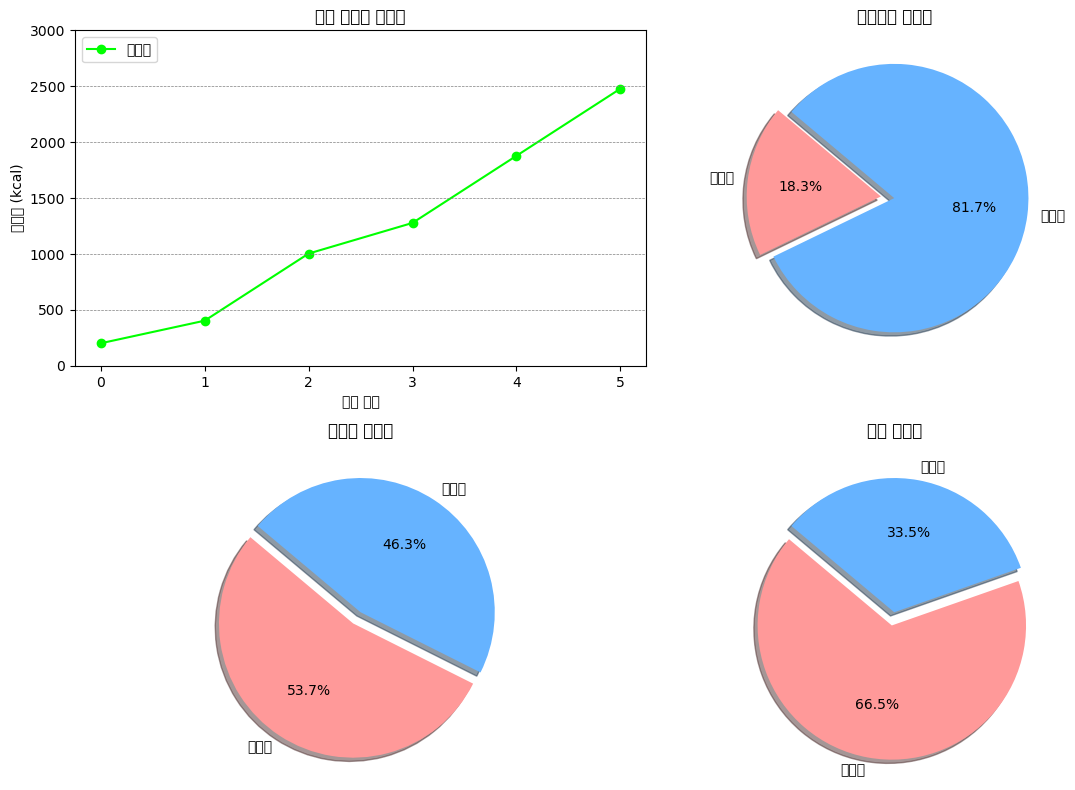

In [82]:
person = Person(age=25, gender='female', disease=['간경화'])
#현재 음식 섭취시 무조건 식단 추천으로 변경해놓은 상태
dis_confirm_food(17, df, dis, person)
dis_confirm_food(17, df, dis, person)
consume_food2(person, kal=600, car=0, sug=0, fat=0, trans=0, sat=0, chol=0, pro=0, cal=0, sod=0)
dis_confirm_food(87, df, dis, person)
consume_food2(person, kal=600, car=0, sug=0, fat=0, trans=0, sat=0, chol=0, pro=0, cal=0, sod=0)
consume_food2(person, kal=600, car=0, sug=0, fat=0, trans=0, sat=0, chol=0, pro=0, cal=0, sod=0)

make_graph(person)

In [17]:
print(find_med_row(med,15))

품목기준코드                                                197000208
제품명                                                        건위황정
문항1           이 약은 위산과다, 속쓰림, 위부불쾌감, 위부팽만감, 체함, 구역, 구토, 위통, ...
문항2           성인 1회 5정, 1일 3회 식간 및 취침시 복용합니다.복용간격은 4시간 이상으로 ...
문항3                                                     해당사항 없음
문항4           이 약을 복용하기 전에 신장장애 환자는 의사 또는 약사와 상의하십시오.정해진 용법과...
문항5                                                     해당사항 없음
문항6             변비, 설사 등이 나타나는 경우 복용을 즉각 중지하고 의사 또는 약사와 상의하십시오.
ITEM_IMAGE    https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...
Name: 15, dtype: object
